<a href="https://colab.research.google.com/github/Danil1D/Machine-learning/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%BB%D0%B0%D0%B1%E2%84%966(%D0%B7%D0%B0%D0%B2%D0%B4_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# 1. Завантаження та підготовка даних
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 2. Побудова базової лінійної регресійної моделі
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Базова модель:')
print(f'MSE на навчальній вибірці: {mse_train}')
print(f'MSE на тестовій вибірці: {mse_test}')
print(f'R^2 на навчальній вибірці: {r2_train}')
print(f'R^2 на тестовій вибірці: {r2_test}')

Базова модель:
MSE на навчальній вибірці: 0.5179331255246699
MSE на тестовій вибірці: 0.5558915986952444
R^2 на навчальній вибірці: 0.6125511913966952
R^2 на тестовій вибірці: 0.5757877060324508


In [4]:
# 3. Аналіз перенавчання
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Навчальна вибірка:')
print(f'MSE на навчальній вибірці: {mse_train}')
print(f'R² на навчальній вибірці: {r2_train}')
print(f'\nТестова вибірка:')
print(f'MSE на тестовій вибірці: {mse_test}')
print(f'R² на тестовій вибірці: {r2_test}')

if mse_train < mse_test:
    print("\nМодель перенавчена: вона показує кращі результати на навчальних даних.")
else:
    print("\nМодель не перенавчена.")

Навчальна вибірка:
MSE на навчальній вибірці: 0.5179331255246699
R² на навчальній вибірці: 0.6125511913966952

Тестова вибірка:
MSE на тестовій вибірці: 0.5558915986952444
R² на тестовій вибірці: 0.5757877060324508

Модель перенавчена: вона показує кращі результати на навчальних даних.


In [5]:
# 4. Запобігання перенавчанню
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

y_test_pred_ridge = ridge_reg.predict(X_test)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print(f'Ridge регресія (L2 регуляризація):')
print(f'MSE на тестовій вибірці: {mse_test_ridge}')
print(f'R^2 на тестовій вибірці: {r2_test_ridge}')

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

y_test_pred_lasso = lasso_reg.predict(X_test)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f'Lasso регресія (L1 регуляризація):')
print(f'MSE на тестовій вибірці: {mse_test_lasso}')
print(f'R^2 на тестовій вибірці: {r2_test_lasso}')

Ridge регресія (L2 регуляризація):
MSE на тестовій вибірці: 0.5558034669932211
R^2 на тестовій вибірці: 0.5758549611440126
Lasso регресія (L1 регуляризація):
MSE на тестовій вибірці: 0.6135115198058131
R^2 на тестовій вибірці: 0.5318167610318159


In [6]:
# 5. Оцінка результатів
print('\nПорівняння моделей:')
print(f'Лінійна регресія: MSE на тестовій вибірці: {mse_test}, R^2: {r2_test}')
print(f'Ridge регресія: MSE на тестовій вибірці: {mse_test_ridge}, R^2: {r2_test_ridge}')
print(f'Lasso регресія: MSE на тестовій вибірці: {mse_test_lasso}, R^2: {r2_test_lasso}')



Порівняння моделей:
Лінійна регресія: MSE на тестовій вибірці: 0.5558915986952444, R^2: 0.5757877060324508
Ridge регресія: MSE на тестовій вибірці: 0.5558034669932211, R^2: 0.5758549611440126
Lasso регресія: MSE на тестовій вибірці: 0.6135115198058131, R^2: 0.5318167610318159


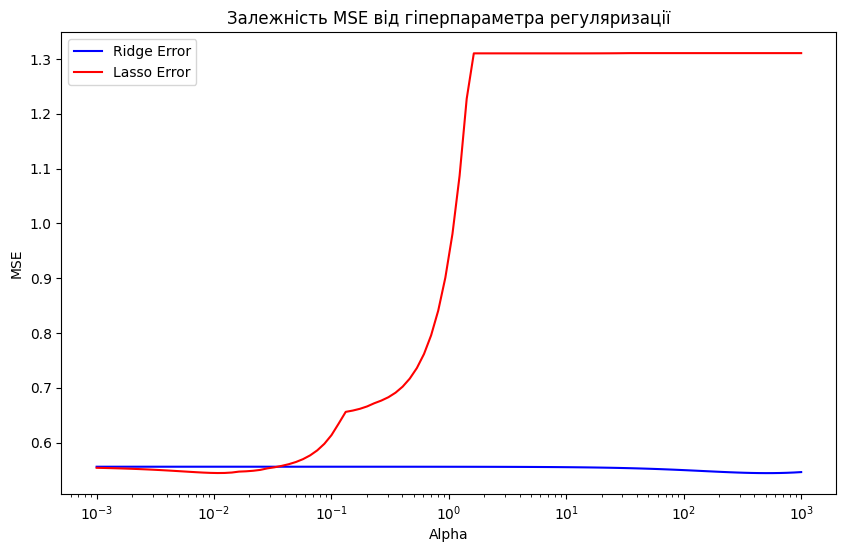

In [7]:
# 6. Візуалізація залежності помилки від гіперпараметра регуляризації
alphas = np.logspace(-3, 3, 100)
ridge_errors = []
lasso_errors = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    lasso_reg = Lasso(alpha=alpha)

    ridge_reg.fit(X_train, y_train)
    lasso_reg.fit(X_train, y_train)

    ridge_pred = ridge_reg.predict(X_test)
    lasso_pred = lasso_reg.predict(X_test)

    ridge_errors.append(mean_squared_error(y_test, ridge_pred))
    lasso_errors.append(mean_squared_error(y_test, lasso_pred))

plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_errors, label='Ridge Error', color='b')
plt.plot(alphas, lasso_errors, label='Lasso Error', color='r')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Залежність MSE від гіперпараметра регуляризації')
plt.legend()
plt.show()
